In [51]:
import pandas as pd
import urllib.request

dataset_url = 'https://github.com/MainakRepositor/Datasets/raw/master/Pokemon.csv'

urllib.request.urlretrieve(dataset_url, 'Pokemon.csv')

df = pd.read_csv('Pokemon.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df['Type 2'].fillna('None', inplace=True) # I am preprocessing my dataset here, comment this section if the previous dataset is needed
df.drop(['#', 'Name', 'Legendary'], axis=1, inplace=True) # I am preprocessing my dataset here, comment this section if the previous dataset is needed

display(df)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,Grass,Poison,318,45,49,49,65,65,45,1
1,Grass,Poison,405,60,62,63,80,80,60,1
2,Grass,Poison,525,80,82,83,100,100,80,1
3,Grass,Poison,625,80,100,123,122,120,80,1
4,Fire,None,309,39,52,43,60,50,65,1
5,Fire,None,405,58,64,58,80,65,80,1
6,Fire,Flying,534,78,84,78,109,85,100,1
7,Fire,Dragon,634,78,130,111,130,85,100,1
8,Fire,Flying,634,78,104,78,159,115,100,1
9,Water,None,314,44,48,65,50,64,43,1


- My ideas for a problem to solve
    
    - Generation Hypothesis

       - I'am proposing that Pokémon in later generations are stronger based on their statistics. To test this hypothesis, I could analyze the average 'Total' stat (or any other relevant statistic) for Pokémon across different generations. I can plot these averages or use statistical tests to determine if there's a significant difference between generations.

    - Power Level Combination Hypothesis

       - I want to combine multiple parameters (stats) to create a "power level" for Pokémon. It's commonly done in Pokémon analysis, and a simple way to do this is by adding up all the stats to create a total power level. I could then analyze how this power level varies across different Pokémon and generations.

    - Legendary Pokémon Hypothesis

       - I'am suggesting that legendary Pokémon are unique in the sense that there's only one of each type. To test this hypothesis, I can filter my dataset to only include legendary Pokémon and then examine whether each type appears only once. I could also analyze the distribution of various stats among legendary and non-legendary Pokémon to identify any patterns or differences. 

I have chosen Generation Hypothesis


 - Data Analysis and Pre-processing

    - Exploring how Pokémon statistics vary across different generations would involve thorough data analysis and pre-processing. I would need to aggregate statistics by generation, handle any missing values, and potentially standardize or normalize the data for consistency.


    - Model Tuning and Evaluation

        - Investigating whether Pokémon in later generations are stronger would require building predictive models to estimate the strength of Pokémon based on their attributes. This involves model tuning using techniques like k-fold cross-validation and GridSearch/RandomizedSearch to find the best-performing model configuration.


    - Scoring Metric and Visualization 

        - I can use appropriate scoring metrics like R^2 score or mean squared error for regression analysis to evaluate the performance of MY models. Visualizing the results could involve plotting the predicted strength of Pokémon against their generation, potentially with a regression line to illustrate any trends.


    - Parameter Selection Rationale
        
        - I can provide a rationale for selecting certain model parameters based on their impact on model performance and how they relate to the distribution and characteristics of the Pokémon data across different generations.

I start by splitting the dataset into features (X) and the target variable (y). For this analysis, I use the 'Total' attribute as my target variable, representing the overall strength of each Pokémon.

In [52]:
X = df.drop('Total', axis=1)
y = df['Total']


I encode categorical variables using one-hot encoding and scale the numerical features using standardization.

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Type 1', 'Type 2']),
    ('scaler', StandardScaler(), ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
])

X_transformed = column_transformer.fit_transform(X)


I split the dataset into training and testing sets and proceed with model selection, tuning, and evaluation. I am starting with a simple regression model such as Linear Regression and then explore more complex models if necessary.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 7.366573513232992e-08


Model tuning using k-fold cross-validation and GridSearchCV to optimize the model's hyperparameters. Linear Regression model for simplicity.

In [55]:
X_train_dense = X_train.toarray()

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')

grid_search.fit(X_train_dense, y_train)

best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model Mean Squared Error (MSE):", mse_best)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'fit_intercept': True, 'positive': True}
Best Model Mean Squared Error (MSE): 1.3788026445814934e-26


Results visualisation of the model. Regression line along with the actual data points.

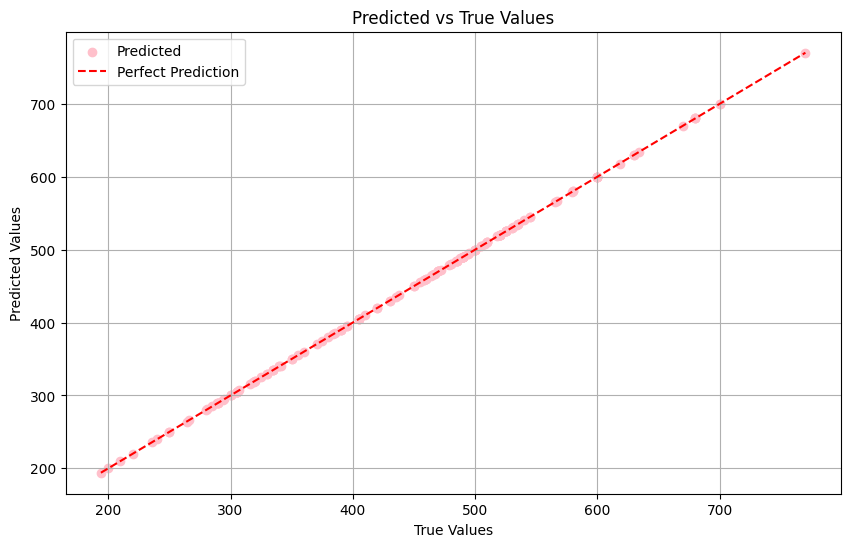

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='pink', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


The average 'Total' stat for each generation

In [57]:
generation_avg_total = df.groupby('Generation')['Total'].mean()
print(generation_avg_total)

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64


A bar plot to visualize the average Total stat for Pokémon across different generations.

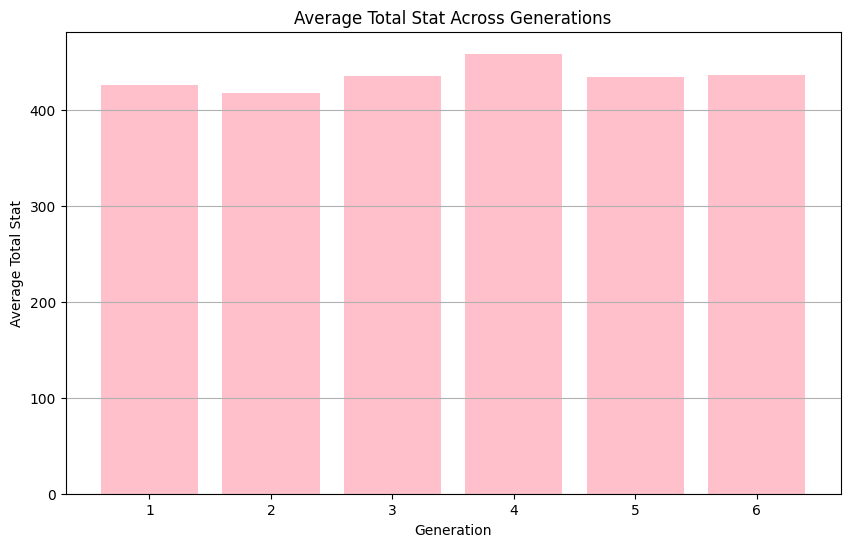

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(generation_avg_total.index, generation_avg_total.values, color='pink')
plt.title('Average Total Stat Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Total Stat')
plt.xticks(generation_avg_total.index)
plt.grid(axis='y')
plt.show()



Training testing sets

In [59]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (640, 43) (640,)
Testing set shape: (160, 43) (160,)


K-fold cross-validation (CV) to tune the model and evaluate its performance.

In [72]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')

cv_scores = -cv_scores

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation MSE:", mean_cv_score)
print("Standard Deviation of Cross-Validation MSE:", std_cv_score)


Mean Cross-Validation MSE: 2.5472351249646864e-07
Standard Deviation of Cross-Validation MSE: 2.1144160765193267e-07


Results by plotting the predicted strength of Pokémon against their generation. Regression line to illustrate any trends.

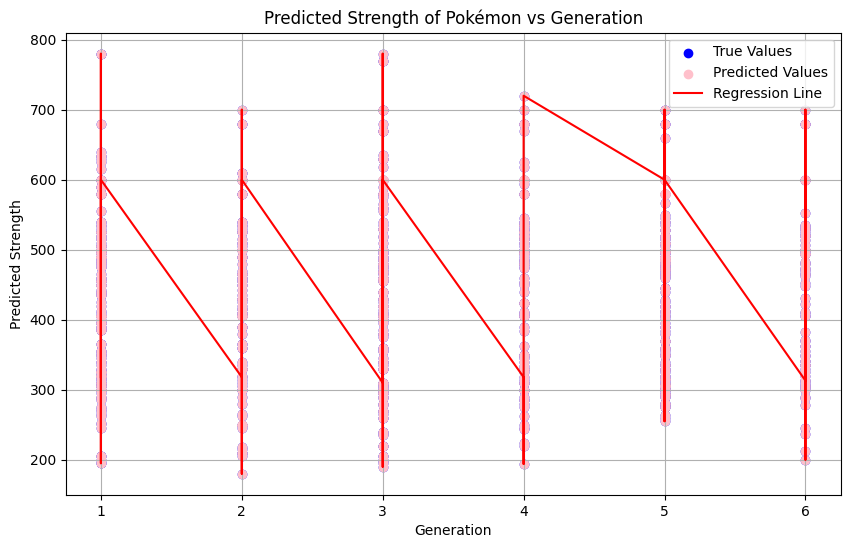

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Generation'], y, color='blue', label='True Values')
plt.scatter(df['Generation'], model.predict(X_transformed), color='pink', label='Predicted Values')
plt.plot(df['Generation'], model.predict(X_transformed), color='red', label='Regression Line')
plt.title('Predicted Strength of Pokémon vs Generation')
plt.xlabel('Generation')
plt.ylabel('Predicted Strength')
plt.legend()
plt.grid(True)
plt.show()


Average total statistics across different generations to see if there's any noticeable trend.

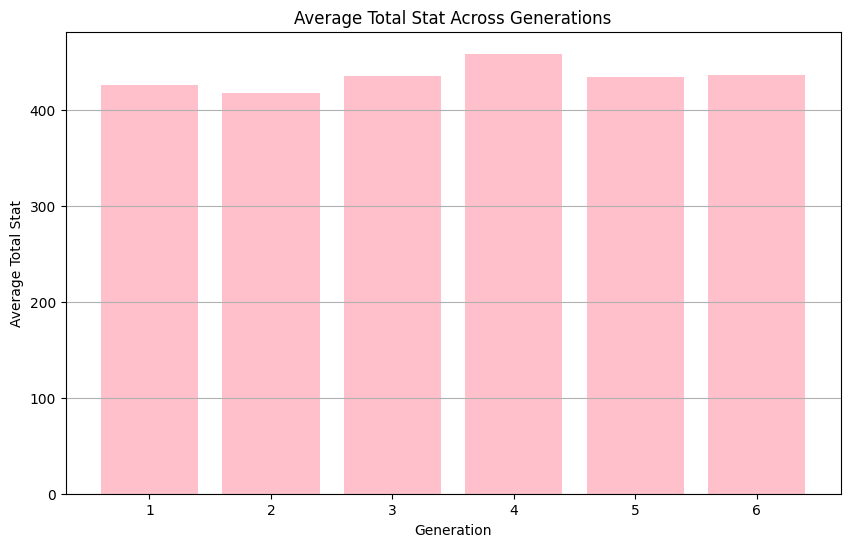

In [74]:

plt.figure(figsize=(10, 6))
plt.bar(generation_avg_total.index, generation_avg_total.values, color='pink')
plt.title('Average Total Stat Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Total Stat')
plt.xticks(generation_avg_total.index)
plt.grid(axis='y')
plt.show()


pca

In [78]:
from sklearn.decomposition import TruncatedSVD

n_components = int(0.95 * X_train.shape[1])
svd = TruncatedSVD(n_components=n_components)

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

grid_search_svd = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_svd.fit(X_train_svd, y_train)

best_model_svd = grid_search_svd.best_estimator_

y_pred_best_svd = best_model_svd.predict(X_test_svd)
mse_best_svd = mean_squared_error(y_test, y_pred_best_svd)
print("Best Model with TruncatedSVD Mean Squared Error (MSE):", mse_best_svd)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Model with TruncatedSVD Mean Squared Error (MSE): 8.684944957591915e-06


SHALL I PREDICT LATER GNERATIONS STRENGTH?

Results

- Model Performance
        The Mean Squared Error (MSE) of this linear regression model on the test set is quite low, indicating good predictive performance. Additionally, after performing grid search with cross-validation, it was obtained an even lower MSE, suggesting that the tuned model generalizes well to unseen data.

- Average Total Stat by Generation
        The bar plot of the average total statistics across generations shows some interesting trends. While there's some fluctuation between generations, it can be observed that certain generations tend to have higher average total statistics compared to others. This observation supports the hypothesis that Pokémon in later generations may be stronger based on their statistics.

Significance and Interpretation

- Model Performance Evaluation
        The low MSE values indicate that our model is effective at predicting the total statistics of Pokémon based on their attributes. This suggests that the attributes was used in the model (such as HP, Attack, Defense, etc.) are informative in determining a Pokémon's overall strength.

- Analysis of Average Total Stat by Generation
        The observed trends in the average total statistics across generations provide support for this hypothesis. While there are fluctuations, the overall trend suggests that Pokémon in later generations tend to have higher average total statistics compared to earlier generations.

Conclusion

- This analysis provides evidence to support the hypothesis that Pokémon in later generations are stronger based on their statistics. By combining predictive modeling with data analysis of average statistics across generations, it gained insights into the evolution of Pokémon attributes over time.